In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("FastagFraudDetection.csv")
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
df.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

# EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

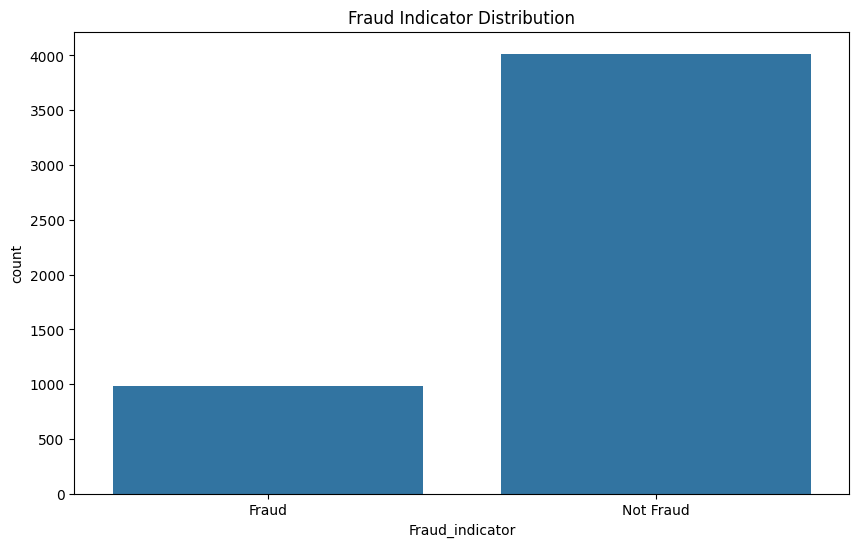

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Fraud Indicator Distribution')
plt.show()

<ipython-input-6-8ed8c8faeeb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df,palette='Set2')


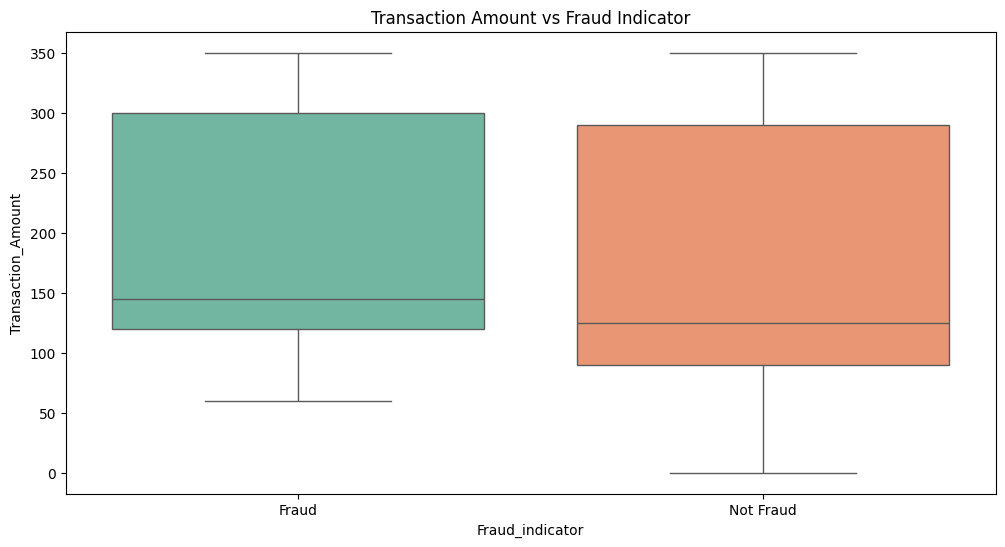

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df,palette='Set2')
plt.title('Transaction Amount vs Fraud Indicator')
plt.show()

<ipython-input-7-d817340e82e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=df,palette='Set2')


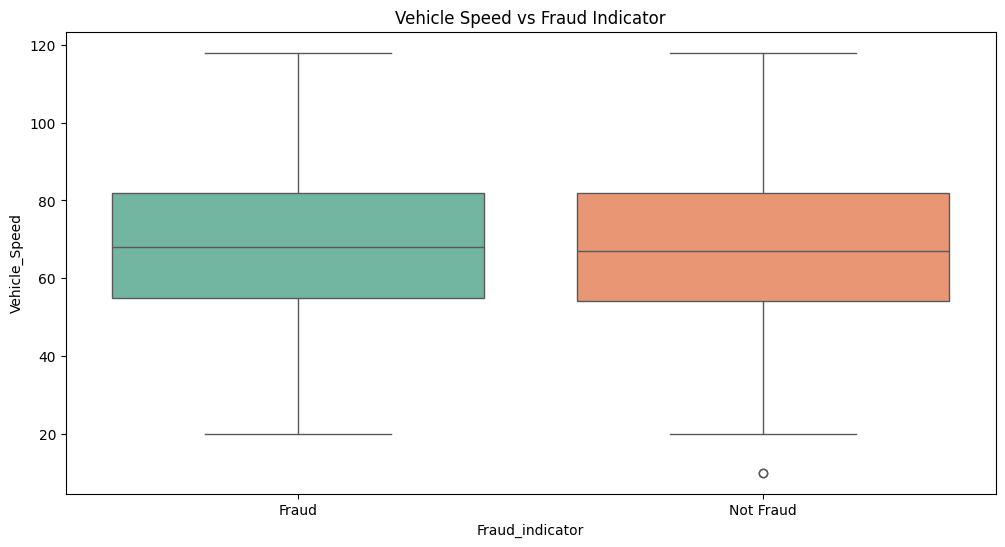

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=df,palette='Set2')
plt.title('Vehicle Speed vs Fraud Indicator')
plt.show()

# Preprocessing

In [8]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [9]:
df['FastagID'].fillna(df['FastagID'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [12]:
df.dtypes

Transaction_ID                    int64
Timestamp                datetime64[ns]
Vehicle_Type                     object
FastagID                         object
TollBoothID                      object
Lane_Type                        object
Vehicle_Dimensions               object
Transaction_Amount                int64
Amount_paid                       int64
Geographical_Location            object
Vehicle_Speed                     int64
Vehicle_Plate_Number             object
Fraud_indicator                  object
Hour                              int32
Day                               int32
Month                             int32
Year                              int32
dtype: object

# Feature Exctraction & Model Building

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop original timestamp and non-numeric columns not required for the model
df.drop(columns=['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID'], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['Vehicle_Type', 'Lane_Type', 'Geographical_Location', 'Vehicle_Plate_Number', 'Vehicle_Dimensions']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert 'Fraud_indicator' to binary values if necessary
if df['Fraud_indicator'].dtype == 'object':
    df['Fraud_indicator'] = df['Fraud_indicator'].map({'Not Fraud': 0, 'Fraud': 1})

# Split the data into features and target variable
X = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation

In [14]:
# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.048484848484848485
MSE: 0.048484848484848485
RMSE: 0.2201927530252721
R2 Score: 0.7157622739018088
